In [1]:
import numpy as np
import time
import functools
import matplotlib.pyplot as plt

# 数据准备与可视化

## 准备训练数据

In [2]:
n = 100
# 设定随机数种子，使每一次运行得到相同的结果
np.random.seed(42)

生成现线性可分的数据

In [3]:
# 随即初始化得到训练样本，注意每一个样本x是一个三维向量，且第三维的值始终为1
X_train = np.random.rand(n,2)
Y_train = np.ones((n,), dtype=int)
X_train = np.array([np.append(x, 1) for x in X_train])
# 强行让训练样本线性可分，其中1表示正样本，-1表示负样本
Y_train[X_train[:, 1] > 0.5] = -1

dataset1 = {'X': X_train, 'Y': Y_train}

In [4]:
print('X_train:\t\t\t\t\t\t\tY_train:')
X, Y = dataset1['X'], dataset1['Y']
for i in range(len(X)):
    print('\t{: }\t{: }\t{:<2}\t\t{: }'.format(*X[i], Y[i]))

X_train:							Y_train:
	 0.3745401188473625	 0.9507143064099162	1.0		-1
	 0.7319939418114051	 0.5986584841970366	1.0		-1
	 0.15601864044243652	 0.15599452033620265	1.0		 1
	 0.05808361216819946	 0.8661761457749352	1.0		-1
	 0.6011150117432088	 0.7080725777960455	1.0		-1
	 0.020584494295802447	 0.9699098521619943	1.0		-1
	 0.8324426408004217	 0.21233911067827616	1.0		 1
	 0.18182496720710062	 0.18340450985343382	1.0		 1
	 0.3042422429595377	 0.5247564316322378	1.0		-1
	 0.43194501864211576	 0.2912291401980419	1.0		 1
	 0.6118528947223795	 0.13949386065204183	1.0		 1
	 0.29214464853521815	 0.3663618432936917	1.0		 1
	 0.45606998421703593	 0.7851759613930136	1.0		-1
	 0.19967378215835974	 0.5142344384136116	1.0		-1
	 0.5924145688620425	 0.046450412719997725	1.0		 1
	 0.6075448519014384	 0.17052412368729153	1.0		 1
	 0.06505159298527952	 0.9488855372533332	1.0		-1
	 0.9656320330745594	 0.8083973481164611	1.0		-1
	 0.3046137691733707	 0.09767211400638387	1.0		 1
	 0.6842330265121569	 0.440

生成线性不可分的数据

In [5]:
# 在dataset1的基础上构造线性不可分数据集
X_train = dataset1['X'].copy()
Y_train = dataset1['Y'].copy()
# 强行设置一个样本的值，使得整个数据集线性不可分
X_train[0] = np.array([0.5180034749718639, 0.11005192452767676, 1.0])
Y_train[0]=-1

dataset2 = {'X': X_train, 'Y': Y_train}

In [6]:
print('X_train:\t\t\t\t\t\t\tY_train:')
X, Y = dataset2['X'], dataset2['Y']
for i in range(len(X)):
    print('\t{: }\t{: }\t{:<2}\t\t{: }'.format(*X[i], Y[i]))

X_train:							Y_train:
	 0.5180034749718639	 0.11005192452767676	1.0		-1
	 0.7319939418114051	 0.5986584841970366	1.0		-1
	 0.15601864044243652	 0.15599452033620265	1.0		 1
	 0.05808361216819946	 0.8661761457749352	1.0		-1
	 0.6011150117432088	 0.7080725777960455	1.0		-1
	 0.020584494295802447	 0.9699098521619943	1.0		-1
	 0.8324426408004217	 0.21233911067827616	1.0		 1
	 0.18182496720710062	 0.18340450985343382	1.0		 1
	 0.3042422429595377	 0.5247564316322378	1.0		-1
	 0.43194501864211576	 0.2912291401980419	1.0		 1
	 0.6118528947223795	 0.13949386065204183	1.0		 1
	 0.29214464853521815	 0.3663618432936917	1.0		 1
	 0.45606998421703593	 0.7851759613930136	1.0		-1
	 0.19967378215835974	 0.5142344384136116	1.0		-1
	 0.5924145688620425	 0.046450412719997725	1.0		 1
	 0.6075448519014384	 0.17052412368729153	1.0		 1
	 0.06505159298527952	 0.9488855372533332	1.0		-1
	 0.9656320330745594	 0.8083973481164611	1.0		-1
	 0.3046137691733707	 0.09767211400638387	1.0		 1
	 0.6842330265121569	 0.44

## 可视化训练数据
需要注意的一点是，我们的样本x是三维空间中位于平面z=1上的点，而法线w所对应的二维平面（决策面）与z=1的交线将所有样本划分成了两类。

In [7]:
def drawDataset(dataset, ax, title=None):
    idx1 = np.where(dataset['Y']==-1)[0]
    idx2 = np.where(dataset['Y']==1)[0]
    
    ax.set_title(title)
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.scatter(dataset['X'][idx1,0], dataset['X'][idx1,1], marker='x', label='negative')
    ax.scatter(dataset['X'][idx2,0], dataset['X'][idx2,1], marker='o', label='positive')
    ax.legend(loc = 'upper right') 

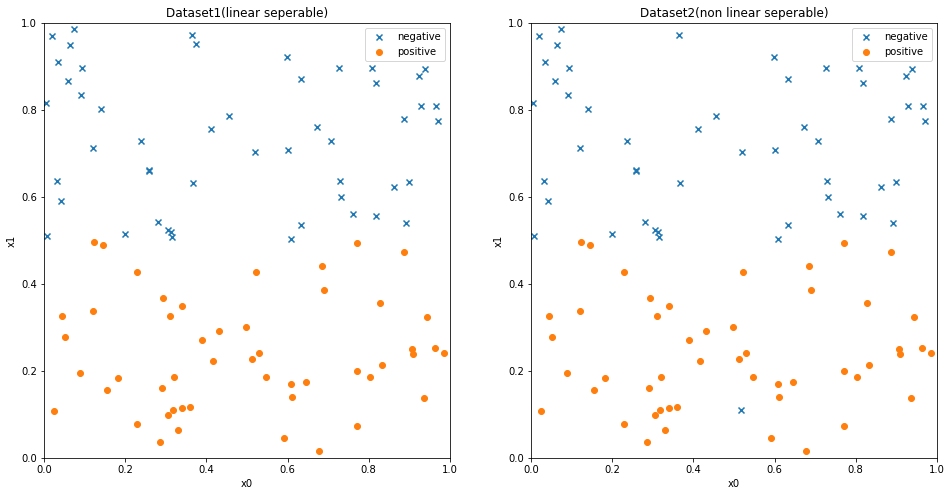

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
drawDataset(dataset1, ax1, 'Dataset1(linear seperable)')
drawDataset(dataset2, ax2, 'Dataset2(non linear seperable)')

plt.show()

# 算法

使用妆饰器完成计时功能

In [9]:
def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kw):
        start_time = time.time()
        result = func(*args, **kw)
        end_time = time.time()
        print(func.__name__+'花费时间'+str(end_time-start_time)+'秒')
        return result
    return wrapper

In [10]:
def predict(X, w):
    return np.array([1 if w.dot(xi) > 0 else -1 for xi in X])

In [11]:
def evaluate(dataset, w):
    Y_pred = predict(dataset['X'], w)
    n_correct = sum(dataset1['Y']==Y_pred)
    print('在训练集上的正确率为{:.3f}'.format(n_correct/len(Y_pred)))

## PLA

In [12]:
@timer
def PLA(X_train, Y_train, w):
    for _ in range(10000):
        flag = True
        for i in range(len(X_train)):
            xi = X_train[i]
            yi = Y_train[i]
            # 犯错则更新
            if yi*xi.dot(w) <= 0:
                w += yi*xi
                flag = False
        if flag:
            break
    return w

## PLA with pocket

In [13]:
@timer
def PLA_with_pocket(X_train, Y_train, w, max_epoch=200):
    best_count = sum(predict(X_train, w) == Y_train)
    best_w = w.copy()
    for epoch in range(max_epoch):
        for i in range(len(X_train)):
            xi = X_train[i]
            yi = Y_train[i]
            if yi*xi.dot(w) <=0:
                w += yi*xi
                new_count = sum(predict(X_train, w) == Y_train)
                if new_count >= best_count:
                    best_count = new_count
                    best_w = w.copy()
                    if best_count == len(X_train):
                        return best_w, best_count               
    return best_w, best_count

# 结果可视化

使用公式$\frac{-(w_0*x_0+w_2)}{w_1}$计算任意两点的$x_1$，从而作出分界线

In [14]:
# 通过x0和w计算出x1
def projection(x0_list, w):
    x1_list = []
    for x0 in x0_list:
        x1 = -(w[0] * x0 + w[2]) / w[1]
        x1_list.append(x1)
    return x1_list

In [15]:
def show_with_line(dataset, w_f, ax, title=None):
    X_train = dataset['X']
    Y_train = dataset['Y']
    idx1 = np.where(Y_train==-1)[0]
    idx2 = np.where(Y_train==1)[0]
    ax.scatter(X_train[idx1,0], X_train[idx1,1], marker='x', label='negative')
    ax.scatter(X_train[idx2,0], X_train[idx2,1], marker='o', label='positive')
    
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.set_title(title)

    line_x = np.linspace(-2, 2, 100)
    line_y = projection(line_x, w_f)
    ax.plot(line_x, line_y, color='black', linewidth=2)
    # 使用fill_between方法进行背景填充
    ax.fill_between(line_x, 1,line_y, color='blue', alpha=0.2)
    ax.fill_between(line_x, line_y,0, color='red', alpha=0.2)

    ax.legend(loc = 'upper right') 

## 线性可分数据集

In [16]:
w = np.random.rand(3)
w_f1 = PLA(dataset1['X'], dataset1['Y'], w)
w = np.random.rand(3)
w_f2, _ = PLA_with_pocket(dataset1['X'], dataset1['Y'], w)

PLA花费时间0.03312826156616211秒
PLA_with_pocket花费时间0.17500662803649902秒


In [17]:
evaluate(dataset1, w_f1)
evaluate(dataset1, w_f2)

在训练集上的正确率为1.000
在训练集上的正确率为1.000


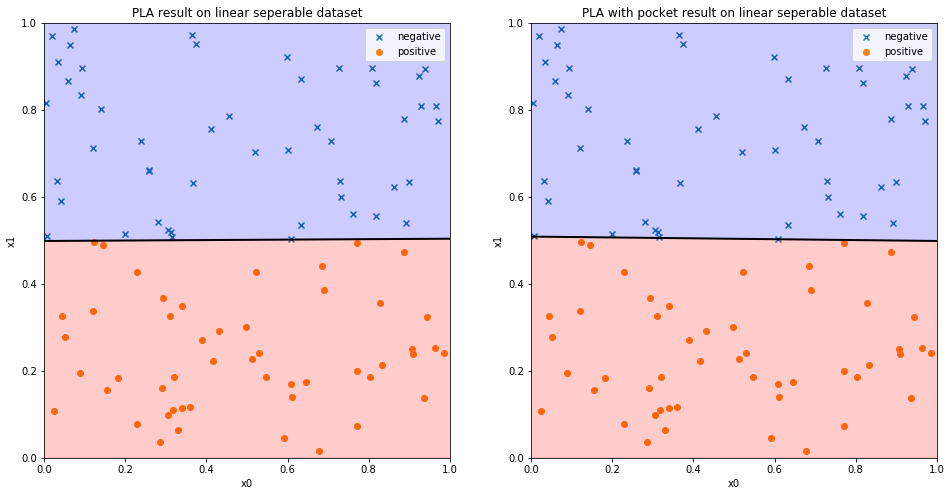

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
show_with_line(dataset1, w_f1, ax1, title='PLA result on linear seperable dataset')
show_with_line(dataset1, w_f2, ax2, title='PLA with pocket result on linear seperable dataset')
plt.show()

## 线性不可分数据集

In [19]:
w = np.random.rand(3)
w_f1 = PLA(dataset2['X'], dataset2['Y'], w)
w = np.random.rand(3)
w_f2, _ = PLA_with_pocket(dataset2['X'], dataset2['Y'], w)

PLA花费时间3.919964551925659秒
PLA_with_pocket花费时间0.84470534324646秒


In [20]:
evaluate(dataset2, w_f1)
evaluate(dataset2, w_f2)

在训练集上的正确率为0.950
在训练集上的正确率为0.980


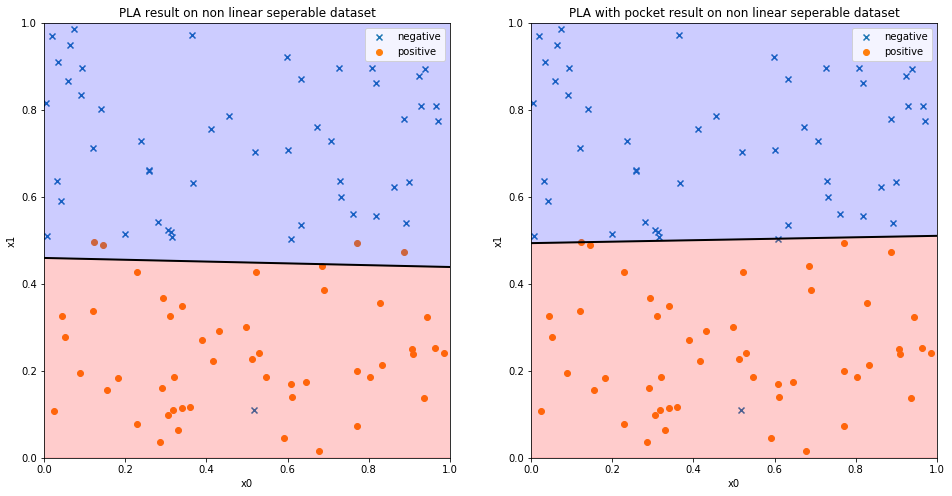

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
show_with_line(dataset2, w_f1, ax1, title='PLA result on non linear seperable dataset')
show_with_line(dataset2, w_f2, ax2, title='PLA with pocket result on non linear seperable dataset')
plt.show()

# 时间开销分析
在线性不可分数据集上，PLA算法永远不会收敛，而PLA with pocket算法会在达到最大运行次数后停止，因此不具有可比性。

在线性可分数据集上，令两种算法的起点$w_0$相同，则每次更新时，PLA with pocket算法都多遍历一次整个数据集执行以计算更新后$w$的正确率。因此，在相同条件下（数据集、初始值和更新顺序），PLA with pocket算法总是慢于PLA算法，并且数据集越大，这两个算法的时间开销差距也越大。

In [22]:
datasets = []
for n in range(10, 2000, 10):
    # 随即初始化得到训练样本，注意每一个样本x是一个三维向量，且第三维的值始终为1
    X_train = np.random.rand(n,2)
    Y_train = np.ones((n,), dtype=int)
    X_train = np.array([np.append(x, 1) for x in X_train])
    # 强行让训练样本线性可分，其中1表示正样本，-1表示负样本
    Y_train[X_train[:, 1] > 0.5] = -1

    dataset = {'X': X_train, 'Y': Y_train}
    datasets.append(dataset)

In [23]:
PLA_time = []
pocket_time = []
for dataset in datasets:
    w = np.random.rand(3)
    
    start_time = time.time()
    PLA(dataset['X'], dataset['Y'], w.copy())
    end_time = time.time()
    PLA_time.append(end_time-start_time)
    
    start_time = time.time()
    PLA_with_pocket(dataset['X'], dataset['Y'], w.copy(), 10000)
    end_time = time.time()
    pocket_time.append(end_time-start_time)

PLA花费时间0.0005104541778564453秒
PLA_with_pocket花费时间0.0031614303588867188秒
PLA花费时间0.0012392997741699219秒
PLA_with_pocket花费时间0.0035920143127441406秒
PLA花费时间0.0003209114074707031秒
PLA_with_pocket花费时间0.0005354881286621094秒
PLA花费时间0.0031588077545166016秒
PLA_with_pocket花费时间0.012580633163452148秒
PLA花费时间0.001954317092895508秒
PLA_with_pocket花费时间0.009686708450317383秒
PLA花费时间0.002568960189819336秒
PLA_with_pocket花费时间0.009199380874633789秒
PLA花费时间0.005356788635253906秒
PLA_with_pocket花费时间0.03426527976989746秒
PLA花费时间0.0034034252166748047秒
PLA_with_pocket花费时间0.023806333541870117秒
PLA花费时间0.06373858451843262秒
PLA_with_pocket花费时间0.3870429992675781秒
PLA花费时间0.5774176120758057秒
PLA_with_pocket花费时间1.8975787162780762秒
PLA花费时间0.007277011871337891秒
PLA_with_pocket花费时间0.056897640228271484秒
PLA花费时间0.4501645565032959秒
PLA_with_pocket花费时间1.508033037185669秒
PLA花费时间0.0018880367279052734秒
PLA_with_pocket花费时间0.019866228103637695秒
PLA花费时间0.01853156089782715秒
PLA_with_pocket花费时间0.1543898582458496秒
PLA花费时间0.001639366149902343

PLA花费时间0.33873462677001953秒
PLA_with_pocket花费时间6.427670240402222秒
PLA花费时间0.49405789375305176秒
PLA_with_pocket花费时间7.625305414199829秒
PLA花费时间0.38866686820983887秒
PLA_with_pocket花费时间7.616511821746826秒
PLA花费时间0.018810033798217773秒
PLA_with_pocket花费时间0.5898346900939941秒
PLA花费时间0.0742344856262207秒
PLA_with_pocket花费时间2.0310323238372803秒
PLA花费时间0.03924131393432617秒
PLA_with_pocket花费时间1.164778470993042秒
PLA花费时间0.5077064037322998秒
PLA_with_pocket花费时间10.630228996276855秒
PLA花费时间0.0726017951965332秒
PLA_with_pocket花费时间1.9984791278839111秒
PLA花费时间0.0442805290222168秒
PLA_with_pocket花费时间1.2245769500732422秒
PLA花费时间0.0673987865447998秒
PLA_with_pocket花费时间2.172825336456299秒
PLA花费时间0.800851583480835秒
PLA_with_pocket花费时间11.997026443481445秒
PLA花费时间1.3758840560913086秒
PLA_with_pocket花费时间19.023717641830444秒
PLA花费时间0.0852203369140625秒
PLA_with_pocket花费时间2.192578077316284秒
PLA花费时间0.03652215003967285秒
PLA_with_pocket花费时间1.007824420928955秒
PLA花费时间0.06238412857055664秒
PLA_with_pocket花费时间1.58648681640625秒
PLA花费时间0.023

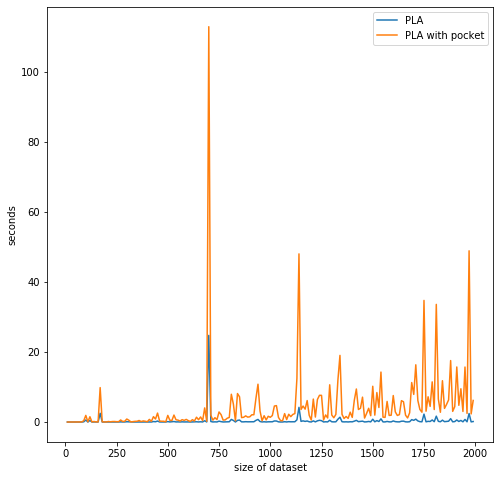

In [27]:
fig = plt.figure(figsize=(8,8))
x = range(10, 2000, 10)
plt.plot(x, PLA_time, label='PLA')
plt.plot(x, pocket_time, label='PLA with pocket')
plt.xlabel('size of dataset')
plt.ylabel('seconds')
plt.legend()
plt.show()